<a href="https://colab.research.google.com/github/fabrytp8/AG1/blob/main/act_c1_c2/Actividad_C1_P2_(1)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convocatoria 1 - Proyecto 2

### Ejercicio 1 (4 puntos)
Utilizar el conjunto de datos "dataset_1.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1.a) Imputación de valores ausentes (2 puntos)

- En aquellas instancias (filas) que contengan UN ÚNICO VALOR NaN en alguno de sus atributos (columnas), se imputará dicho valor.
 * Si el atributo corresponde a una variable discreta, se imputará el valor utilizando la moda de dicho atributo. 
 * Si el atributo corresponde a una variable continua, se imputará el valor utilizando la media de dicho atributo. 
- Aquellas instancias (filas) que contengan MÁS DE UN VALOR NaN en sus atributos, deberán ser eliminadas por completo. 

Los outputs deberán ser: 
- Una matriz "X" de dimensiones M x N, donde M será el número de instancias y N, el de atributos.
- Un vector "y" de dimensiones M. 

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.covariance import EllipticEnvelope
import cv2
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from scipy.stats import kstest # Prueba de Kolmogorov-Smirnov
import matplotlib.pyplot as plt

#Modelado
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import make_scorer, mean_squared_error
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectPercentile, f_regression


In [ ]:
#Cargar datos
ds=np.load('dataset/dataset_1.npy')
# print(ds)
df = pd.DataFrame(ds)
df1 = df.dropna(subset=[1, 2], thresh=1)
data = df1.to_numpy()
#imputar media
imp = SimpleImputer(strategy='mean')
imputer_media = imp.fit(data)
dataBorrado_media = imputer_media.transform(data) 
#imputar moda
imp = SimpleImputer(strategy='most_frequent')
imputer_frec = imp.fit(data)
dataBorrado_frec = imputer_frec.transform(data) 
dataBorrado = data
#reemplazar en columnas
dataBorrado[:,range(5,8)] = dataBorrado_media[:,range(5,8)] 
dataBorrado[:,range(0,5)] = dataBorrado_frec[:,range(0,5)] 
#Crear las salidas
X = dataBorrado[:,:-1]
y = dataBorrado[:,-1]
print(X,y)

[[ 0.          4.          1.         ...  9.04481012  8.2603626
   7.37490176]
 [ 0.          4.          0.         ...  8.56908202 10.9370737
  10.30131004]
 [ 0.          3.          1.         ...  9.68777842 10.69134847
  11.45671439]
 ...
 [ 0.          2.          0.         ...  2.95882711  1.94458971
   8.88390924]
 [ 0.          3.          2.         ...  2.95542398  1.92895933
   9.03304966]
 [ 0.          4.          0.         ...  2.94928374  2.0478487
   8.86096477]] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.


#### 1.b) Eliminación de valores outliers extremos (2 puntos)
- Aplicar el método de Elliptic Envelope fijando una semilla en 42
- Utilizar el diagrama de caja y bigotes para establecer los umbrales de decisión
- Plotear el diagrama (box and whiskers) obtenido a partir de las puntuaciones calculadas con el método Elliptic Envelope
- Eliminar las instancias que contengan valores outliers extremos

Los outputs deberán ser: 
- Una matriz "X" de dimensiones M' x N, donde M' será el nuevo número de instancias y N, el de atributos.
- Un vector "y" de dimensiones M'. 

In [ ]:
#Detección de outliers.
df2 = pd.DataFrame(dataBorrado)
outlier_method = EllipticEnvelope(random_state = 42).fit(df2)
scores_pred = outlier_method.decision_function(df2)
print(scores_pred)
print(np.shape(scores_pred))

[ 9.81944879e+01  1.02270720e+02  1.00352329e+02  1.06437602e+02
  1.08660221e+02  1.04502175e+02  9.74355423e+01  1.01071997e+02
  1.06221513e+02  1.03551472e+02  1.08102447e+02  1.00605960e+02
  9.29790061e+01  1.05097683e+02  1.05155328e+02  1.08783442e+02
  1.08298399e+02  1.07669970e+02  1.03471020e+02  1.02107259e+02
  1.06904055e+02  1.01608285e+02  1.03037005e+02  1.06637216e+02
  1.04879233e+02  1.07859294e+02  1.02786108e+02  1.03172242e+02
  1.04489666e+02  1.06047729e+02  1.05325070e+02  1.01213783e+02
  1.06874743e+02  1.02032012e+02  1.03124086e+02  1.08360970e+02
  9.83270990e+01  1.07268697e+02  1.05107131e+02  1.02672109e+02
  1.02742765e+02  1.06787920e+02  9.64197548e+01  1.03095753e+02
  1.00600253e+02  9.82265550e+01  1.04747545e+02  1.02727919e+02
  1.00641597e+02  1.08588893e+02  1.05069397e+02  1.07759375e+02
  9.48919132e+01  1.02149748e+02  1.07485373e+02  1.01420636e+02
  1.09322482e+02  1.01723175e+02  1.03736149e+02  1.02225691e+02
  1.08317312e+02  1.06505

c:\users\fabry\appdata\local\programs\python\python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-37.889249119839569 > -38.556256515165600). You may want to try with a higher value of support_fraction (current value: 0.511).
  warnings.warn(
c:\users\fabry\appdata\local\programs\python\python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-38.260275702351642 > -40.238554105222072). You may want to try with a higher value of support_fraction (current value: 0.511).
  warnings.warn(


limite inferior:  -10.633728876286
limite superior:  191.4974153227452


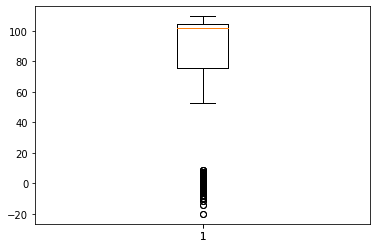

In [ ]:
# Seleccionamos manualmente los umbrales a partir de los cuales vamos a determinar qué valores son outliers y cuáles no. 
Q1 = stats.scoreatpercentile(scores_pred, 25)
Q3 = stats.scoreatpercentile(scores_pred, 75)
RIC = Q3 - Q1
li = Q1 - 3*RIC #xmin
ls = Q3 + 3*RIC #xmax

print('limite inferior: ', li)
print('limite superior: ', ls)

import matplotlib.pyplot as plt
prop = plt.boxplot(scores_pred)
plt.boxplot(scores_pred)
plt.show()

In [ ]:
pos_i = np.where(scores_pred<li)
pos_s = np.where(scores_pred>ls)
print('Posición de outliers en el extremo inferior: ', pos_i[0])
print('Posición de outliers en el extremo superior: ', pos_s[0])

#Eliminación de outliers
dataOut = np.delete(dataBorrado, pos_i[0] ,axis = 0)

#Los outputs deberán ser:
X_mn = dataOut[:,:-1]
y_m = dataOut[:,-1]
print(np.shape(X_mn),np.shape(y_m))

Posición de outliers en el extremo inferior:  [417 423 449]
Posición de outliers en el extremo superior:  []
(492, 8) (492,)


### Ejercicio 2 (6 puntos)

Crear un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, MSE, RMSE, MAPE y R2 aplicando los regresores OLS y KNN en DOS datasets de regresión (a elegir). Nota: Al menos uno de los datasets deberá ser externo a la librería de scikit-learn.

Se debe llevar a cabo:
- Exploración de los datos y descripción del dataset
- Tratamiento de outliers y valores perdidos (si los hay)
- Partición externa de datos
- Estandarización de los datos
- Selección de atributos mediante métodos supervisados (solo uno)
- Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
- Modelado
- Predicción y evaluación sobre el conjunto de test (resultados cuantitativos y cualitativos)
- Breve discusión comparando los resultados obtenidos con cada método.

Dataset -- Espectativa de vida a nivel mundial <br>
https://www.kaggle.com/kumarajarshi/life-expectancy-who


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.covariance import EllipticEnvelope
import cv2
import pandas as pd
from scipy import stats
# https://www.kaggle.com/kumarajarshi/life-expectancy-who
df = pd.read_csv('Life Expectancy Data.csv',sep=',')
print(df)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

In [ ]:
#Existe elementos vacíos en los atributos
print(df.isnull().sum()) 

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
#Imputación de valores ausentes
#Con los elementos de mas frecuencia
df1 =df.to_numpy()
imp = SimpleImputer(strategy='most_frequent')
imputer_entrenado = imp.fit(df1)
data_borrado = imputer_entrenado.transform(df1)
df=pd.DataFrame(data_borrado)
print(df)

               0     1           2     3      4   5     6          7     8   \
0     Afghanistan  2015  Developing  65.0  263.0  62  0.01  71.279624  65.0   
1     Afghanistan  2014  Developing  59.9  271.0  64  0.01  73.523582  62.0   
2     Afghanistan  2013  Developing  59.9  268.0  66  0.01  73.219243  64.0   
3     Afghanistan  2012  Developing  59.5  272.0  69  0.01  78.184215  67.0   
4     Afghanistan  2011  Developing  59.2  275.0  71  0.01   7.097109  68.0   
...           ...   ...         ...   ...    ...  ..   ...        ...   ...   
2933     Zimbabwe  2004  Developing  44.3  723.0  27  4.36        0.0  68.0   
2934     Zimbabwe  2003  Developing  44.5  715.0  26  4.06        0.0   7.0   
2935     Zimbabwe  2002  Developing  44.8   73.0  25  4.43        0.0  73.0   
2936     Zimbabwe  2001  Developing  45.3  686.0  25  1.72        0.0  76.0   
2937     Zimbabwe  2000  Developing  46.0  665.0  24  1.68        0.0  79.0   

        9   ...    12    13    14    15          16

In [ ]:
#El dataset entrega por país información desde el año 2000 al 2015
#Para el análisis se escoge un solo año para todos los paises
# se crea la mascara para el año 2015 y se elimina columnas de nombres de paises para que quede solo
#variables numéricas
from statistics import mean
mask = df[1] == 2015
df3=df[mask]
df3.drop([0], axis=1)
del(df3[0])
del(df3[2])
data=df3.to_numpy()
print(df3)
mean(df3[3])

        1     3      4   5     6           7     8     9     10  11    12  \
0     2015  65.0  263.0  62  0.01   71.279624  65.0  1154  19.1  83   6.0   
16    2015  77.8   74.0   0   4.6  364.975229  99.0     0  58.0   0  99.0   
32    2015  75.6   19.0  21  0.01         0.0  95.0    63  59.5  24  95.0   
48    2015  52.4  335.0  66  0.01         0.0  64.0   118  23.3  98   7.0   
64    2015  76.4   13.0   0  0.01         0.0  99.0     0  47.7   0  86.0   
...    ...   ...    ...  ..   ...         ...   ...   ...   ...  ..   ...   
2858  2015  74.1  157.0   9  0.01         0.0  87.0     0  62.1  10  87.0   
2874  2015  76.0  127.0  28  0.01         0.0  97.0   256  17.5  35  97.0   
2890  2015  65.7  224.0  37  0.01         0.0  69.0   468  41.3  47  63.0   
2906  2015  61.8   33.0  27  0.01         0.0   9.0     9  23.4  40   9.0   
2922  2015  67.0  336.0  22  0.01         0.0  87.0     0  31.8  32  88.0   

        13    14   15           16          17    18    19     20    21  
0

71.61693989071038

In [ ]:
#Outputs
X_matrix = data[:,:-1]
y_matrix = data[:,-1]

print(np.shape(X_matrix),np.shape(y_matrix))

(183, 19) (183,)


In [ ]:
# Limpieza de datos: detección de outliers.
outlier_method = EllipticEnvelope(random_state = 42).fit(df3)
# Obtenemos unos valores de puntuación a nivel de instancia para determinar después las que corresponden con valores atípicos
scores_pred = outlier_method.decision_function(df3)
print(scores_pred)
print(np.shape(scores_pred))

[ 4.88925566e+02  1.14654497e+03  1.23635318e+03  6.02392085e+02
  1.22388332e+03  1.24294827e+03  1.25727265e+03  1.17158912e+03
  1.20445799e+03  1.25597582e+03  1.25530533e+03  1.24575476e+03
  1.09589556e+03  1.25525254e+03  1.25394481e+03  1.25525357e+03
  1.25235091e+03  1.24512847e+03  1.21131079e+03  1.25144089e+03
  1.14245883e+03  1.25454511e+03  1.20423157e+03  1.25614536e+03
  1.25752916e+03  1.12889935e+03  1.25177916e+03  1.21355374e+03
  1.25383870e+03  1.25102358e+03  1.09720816e+03  7.90303915e+02
  1.23193966e+03  1.12880325e+03  1.25103461e+03 -7.10275334e+04
  1.23811555e+03  1.25459015e+03  1.10972788e+03  1.24866130e+03
  1.25651082e+03  1.25661073e+03  1.24308530e+03  1.25481250e+03
  1.25485171e+03 -1.56568615e+02  1.24075112e+03  1.24634235e+03
  1.25275859e+03  1.24389899e+03  9.62819921e+01  1.25776114e+03
  1.05578017e+03  1.23888952e+03  1.25422328e+03 -1.18131499e+04
  1.25349887e+03  1.25629664e+03  1.18008223e+03 -2.40704980e+01
  1.25232777e+03  1.25193

limite inferior:  837.6343331295288
limite superior:  1563.2728138369878


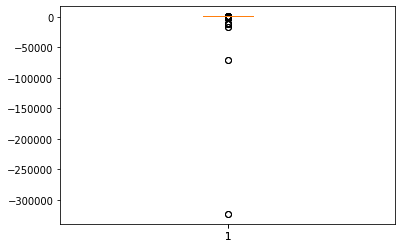

In [ ]:
# Seleccionamos manualmente los umbrales a partir de los cuales vamos a determinar qué valores son outliers y cuáles no. 
Q1 = stats.scoreatpercentile(scores_pred, 25)
Q3 = stats.scoreatpercentile(scores_pred, 75)
RIC = Q3 - Q1
li = Q1 - 3*RIC #xmin
ls = Q3 + 3*RIC #xmax

print('limite inferior: ', li)
print('limite superior: ', ls)

import matplotlib.pyplot as plt
prop = plt.boxplot(scores_pred)
plt.boxplot(scores_pred)
plt.show()

In [ ]:
# Estimación de outliers. Encontramos la posición de los outliers dentro de nuestros conjunto de datos
pos_i = np.where(scores_pred<li)
pos_s = np.where(scores_pred>ls)
print('Posición de outliers en el extremo inferior: ', pos_i[0])
print('Posición de outliers en el extremo superior: ', pos_s[0])

Posición de outliers en el extremo inferior:  [  0   3  31  35  45  50  55  59  66  70  74  75  86  88  92 107 113 117
 118 121 125 126 132 148 153 155 164 165]
Posición de outliers en el extremo superior:  []


In [ ]:
# Eliminación de outliers
dataset_life_np = pd.DataFrame(df3).to_numpy() 
dataset_life_cleaned = np.delete(dataset_life_np, pos_i[0] ,axis = 0)

print(np.shape(dataset_life_cleaned))

X_matrix = dataset_life_cleaned[:,:-1]
y_matrix = dataset_life_cleaned[:, -1]

(155, 20)


In [ ]:
# PARTICIÓN DE DATOS EXTERNA
dataset_life_cleaned = pd.DataFrame(dataset_life_cleaned)

train, test = train_test_split(dataset_life_cleaned, test_size=0.2, shuffle=True, random_state=42) # hold-out

print('Tamaño conjunto entrenamiento:',np.shape(train))
print('Tamaño conjunto test:',np.shape(test))


Tamaño conjunto entrenamiento: (124, 20)
Tamaño conjunto test: (31, 20)


In [ ]:
# ESTANDARIZACIÓN DE LOS DATOS

# Entrenamiento
train = pd.DataFrame(train).to_numpy()
X_train = train[:,:-1]
y_train = train[:, -1]

estandarizador = StandardScaler()
estandarizador.fit(X_train)
mu = estandarizador.mean_
sigma = np.sqrt(estandarizador.var_)
X_train = estandarizador.transform(X_train)


# Test
test = pd.DataFrame(test).to_numpy()
X_test = test[:,:-1]
y_test = test[:, -1]

estandarizador = StandardScaler()
estandarizador.fit(X_test)
mu = estandarizador.mean_
sigma = np.sqrt(estandarizador.var_)
X_test = estandarizador.transform(X_test)

In [ ]:
# SELECCIÓN DE LOS ATRIBUTOS

# Esta selección se va a realizar estudiando si las variables siguen una distribución normal de media 0 y desviación típica 1 --> N(0,1)
alpha = 0.01 # nivel de confianza del 99%
h_norm = np.zeros(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    _, pvalue = kstest(X_train[:, i], 'norm')
    
    # Contraste de hipótesis
    if pvalue<=alpha:
        h_norm[i] = 0 # Los datos NO siguen una distribución normal N(0,1)
    else:
        h_norm[i] = 1 # Los datos SÍ siguen una distribución normal N(0,1)

print('0: no normal  ---- 1: sí normal: ', h_norm)

0: no normal  ---- 1: sí normal:  [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]


c:\users\fabry\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\fabry\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


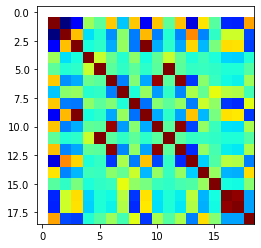

[ 9 10 11 12 17]


In [ ]:
# Esta selección se va a realizando mediante un análisis de CORRELACIÓN para ver la dependencia entre pares de variables
X_train = pd.DataFrame(X_train)
R = np.corrcoef(X_train.transpose())


plt.imshow(R, cmap='jet')
plt.show()

th_cor = 0.9

idx = abs(R)>th_cor
mat_tri_sup = np.triu(idx,1)
# print(mat_tri_sup.astype('uint8'))

row, col = np.where(mat_tri_sup==True)
id_corr = np.unique(col)
print(id_corr)

In [ ]:
# Eliminamos las variables correlacionadas
#Las varibles correlacionadas son :
# >fixed acidity con citric acid (se elimina fixed acidity)
# >fixed acidity con density (se elimina fixed acidity)
X_train = pd.DataFrame(X_train).to_numpy()

X_final = np.delete(X_train, 0, axis=1)
mu_final = np.delete(mu, 0)
sigma_final = np.delete(sigma, 0)

print(np.shape(X_final))

(124, 18)


In [ ]:
# Métricas de evaluación.
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'MSE': 'neg_mean_squared_error',
  'RMSE': 'neg_root_mean_squared_error',
  'R2':   'r2'
}

In [ ]:
# MODELADO

## OLS
regOLS = linear_model.LinearRegression()

# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_validate(regOLS, X_final, y_train, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
#print("cross_val_MAE:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))
pprint(cross_val_results)

# Entrenamiento con todos los datos para obtener los coeficientes del modelo.
modelOLS = regOLS.fit(X_train, y_train)

# Obtención de los coeficientes del modelo.
w = modelOLS.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = modelOLS.intercept_
print('\nTérmino independiente: ', w_0)


## KNN
k = 10
regKNN = KNeighborsRegressor(n_neighbors = k, weights='uniform', metric='euclidean')
modelKNN = regKNN.fit(X_train, y_train)

{'fit_time': array([0.00097942, 0.00096059, 0.00097561, 0.00186634, 0.00095224]),
 'score_time': array([0.00194764, 0.00196838, 0.00204015, 0.00099921, 0.00390291]),
 'test_MAE': array([-1.5431225 , -1.24269517, -1.93946117, -1.15964312, -1.42076088]),
 'test_MSE': array([-4.04023006, -2.29036709, -4.97399168, -2.82299239, -3.41222315]),
 'test_R2': array([0.41343931, 0.62465206, 0.34849553, 0.7132998 , 0.28005578]),
 'test_RMSE': array([-2.01003235, -1.51339588, -2.23024476, -1.6801763 , -1.84722038])}
Model coeficients: 
 [ 0.          1.72857633  0.32491061 -1.84399314  0.12076081 -0.054761
  0.74042271  0.06144449  0.4837816   2.22896705  0.59429997 -0.054761
 -1.01690906  0.09087276  0.08651987  0.07964957 -0.92034085  0.60653964
  0.75177668]

Término independiente:  13.429838709677417


Algoritmo OLS
MAE:  1.7160
MSE:  5.0316
RMSE: 2.2431
R2:   0.4637


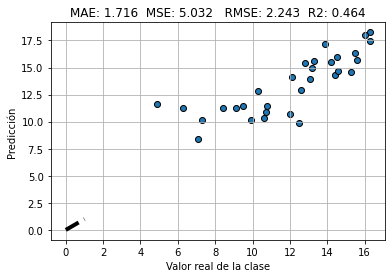

-----------------------------------------------------------
Algoritmo KNN
MAE:  1.8323
MSE:  5.5580
RMSE: 2.3575
R2:   0.4076


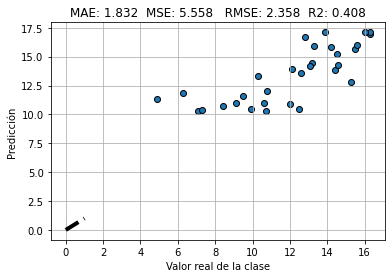

In [ ]:
# PREDICCIÓN

## OLS
# Predicción del conjunto de test
y_pred_testOLS = modelOLS.predict(X_test)
#print(y_pred_testOLS)

# Cálculo de las métricas de evaluación.
MAE_OLS = metrics.mean_absolute_error(y_test, y_pred_testOLS)
MSE_OLS = metrics.mean_squared_error(y_test, y_pred_testOLS, squared=True)
RMSE_OLS = metrics.mean_squared_error(y_test, y_pred_testOLS, squared=False)
R2_OLS = metrics.r2_score(y_test, y_pred_testOLS)

print('Algoritmo OLS')
print('MAE:  %.4f' % MAE_OLS)
print('MSE:  %.4f' % MSE_OLS)
print('RMSE: %.4f' % RMSE_OLS)
print('R2:   %.4f' % R2_OLS)

# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_testOLS, edgecolors=(0, 0, 0))
ax.plot([y_matrix.min(), y_matrix.max()], [y_matrix.min(), y_matrix.max()], 'k--', lw=4)
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f  MSE: %.3f   RMSE: %.3f  R2: %.3f" %
          (MAE_OLS, MSE_OLS, RMSE_OLS, R2_OLS))
plt.grid()
plt.show()


## KNN
y_pred_testKNN = modelKNN.predict(X_test)

# Cálculo de las métricas de evaluación.
MAE_KNN = metrics.mean_absolute_error(y_test, y_pred_testKNN)
MSE_KNN = metrics.mean_squared_error(y_test, y_pred_testKNN, squared=True)
RMSE_KNN = metrics.mean_squared_error(y_test, y_pred_testKNN, squared=False)
R2_KNN = metrics.r2_score(y_test, y_pred_testKNN)

print('-----------------------------------------------------------')
print('Algoritmo KNN')
print('MAE:  %.4f' % MAE_KNN)
print('MSE:  %.4f' % MSE_KNN)
print('RMSE: %.4f' % RMSE_KNN)
print('R2:   %.4f' % R2_KNN)

# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_testKNN, edgecolors=(0, 0, 0))
ax.plot([y_matrix.min(), y_matrix.max()], [y_matrix.min(), y_matrix.max()], 'k--', lw=4)
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f  MSE: %.3f   RMSE: %.3f  R2: %.3f" %
          (MAE_KNN, MSE_KNN, RMSE_KNN, R2_KNN))
plt.grid()
plt.show()

Resultado

Las metricas obtenidas en los dos algoritmos son similares, pero con con menor error es el algoritmos OLS y con K vecinos son muy alejados.

Sepodría mejorar el dataset para tomando todos los años de cada país pero se debe tratar de diferente manera el dataset, por motivos de simplificar el cálculo se ha tomado en cuenta solo un año de cada país y el promedio de vida es 71 hasta el 2015.